<a href="https://colab.research.google.com/github/granantuin/Model_vs_data_station/blob/master/Linearregresion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import seaborn as sns
from google.colab import drive
drive.mount('/content/drive')


In [0]:
drive_4km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_4km_h24toh48_dir/"
drive_1km="/content/drive/My Drive/Colab Notebooks/model_vs_data/Coron_Mars_H24to48_dir/"
dr=[drive_4km,drive_1km]
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0,)
y_data=pd.read_excel(dr[0]+"y_coron_dir.xlsx",index_col=0)
y_data=y_data[y_data>0]#no erroors



In [0]:
 result = x_data.join(y_data, how='outer').dropna()
 

In [0]:
x_data=result.iloc[:,0:9]

In [0]:
y_data=result["value"]

**Select model points to fit linear regression iloc in x_datal**

In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)

In [0]:
y_pred=LinearRegression().fit(x_train,y_train).predict(x_test)

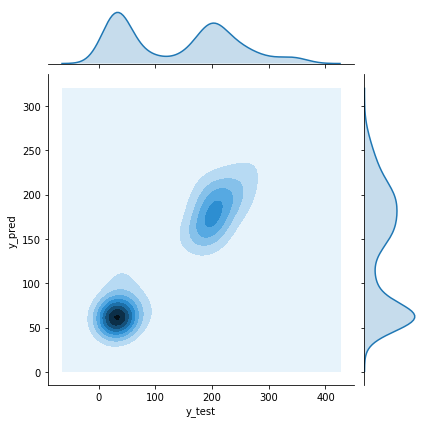

In [113]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,)

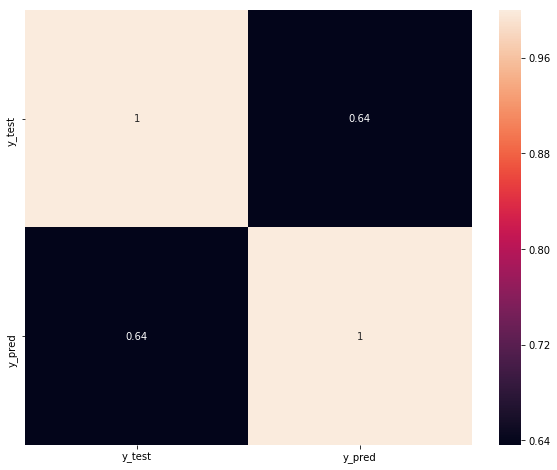

In [114]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2['DIF']=y_pred-y_test
df2["DIF"]=df2["DIF"][df2["DIF"]<180]
df2["DIF"]=df2["DIF"][df2["DIF"]>-180]
  

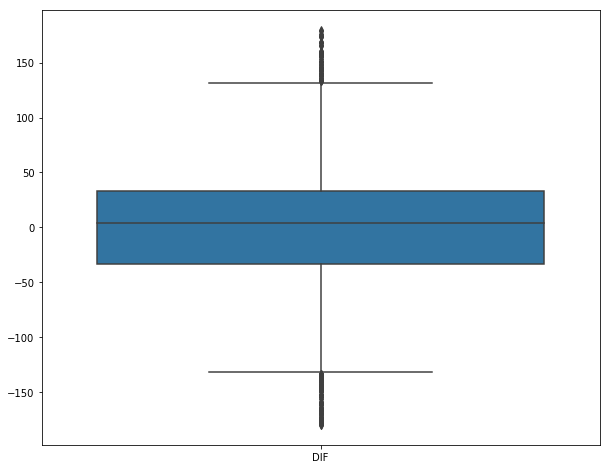

In [116]:
plt.figure(figsize=(10, 8))
ax = sns.boxplot(data=df2.iloc[:,2:3])
  

In [117]:
df2.iloc[:,2:3].describe()

,DIF
count,2464.000000
mean,-0.763580
std,57.953081
min,-179.814924
25%,-33.147492
50%,3.602700
75%,33.028336
max,179.906569


[**Filtering dat wind  only more 2 meters per second**

In [124]:
y_data=pd.read_excel(dr[0]+"y_coron_dir.xlsx",index_col=0)
x_data=pd.read_csv(dr[0]+"x_coron.csv",index_col=0)
x_data=x_data.iloc[:,0:9]
y_data=y_data[y_data>0]
result = x_data.join(y_data, how='outer').dropna()
x_data=result.iloc[:,0:9]
y_data=result["value"]
y_spd=pd.read_excel(dr[0]+"y_coron_spd.xlsx",index_col=0) 
y_spd=y_spd[y_spd>0]/3.6# units=Km/h to m/s
y_spd=y_spd[y_spd>2]#threshold 2m/s
y_spd=y_spd.rename(index=str, columns={"value": "spd"})
res1= x_data.join(y_spd, how='outer').dropna()
res2=res1.join(y_data, how='outer').dropna()
x_data=res2.iloc[:,0:9]
y_data=res2["value"]
x_data.describe()

,0,1,2,3,4,5,6,7,8
count,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000,6468.000000
mean,148.868280,150.997603,148.208809,143.824272,146.163711,144.113661,142.662118,142.410249,139.207378
std,112.189287,108.880285,105.803138,109.961173,108.801177,106.647558,109.318643,105.636778,104.483194
min,0.020764,0.109693,0.197529,0.039205,0.032676,0.047565,0.018086,0.056363,0.167613
25%,27.709926,35.197303,37.191143,28.288396,32.511968,35.417432,31.752803,35.130347,35.583419
50%,181.413589,181.672234,178.784927,179.011246,178.137444,173.212418,178.567398,173.387024,164.066711
75%,242.121990,242.818512,237.025803,230.636555,234.998524,234.929092,225.418549,227.391075,229.458275
max,359.784576,359.929016,359.973175,359.953400,359.932129,359.957916,359.990753,359.982330,359.973602


In [0]:
x_train, x_test, y_train, y_test = train_test_split(x_data,y_data, test_size=0.3, random_state=5)

In [0]:
y_pred=LinearRegression().fit(x_train,y_train).predict(x_test)

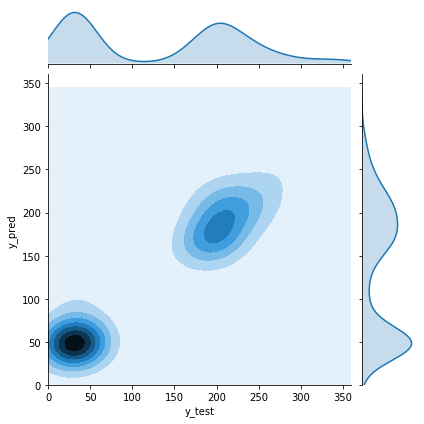

In [128]:
df2 = pd.DataFrame({'y_test': y_test,'y_pred':y_pred})
sc=sns.jointplot(x="y_test",y="y_pred",kind="kde",data=df2,xlim=(0,360),ylim=(0,360),)

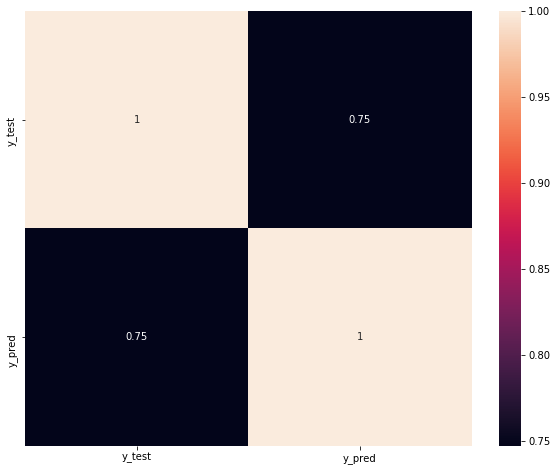

In [129]:
plt.figure(figsize=(10, 8))
sns.heatmap(df2.corr(),annot=True)

In [0]:
df2["DIF"]=df2["y_test"]-df2["y_pred"]
df2["DIF"]=df2["DIF"][df2["DIF"]<180]
df2["DIF"]=df2["DIF"][df2["DIF"]>-180]
  

In [131]:
df2["DIF"].describe()

count    1857.000000
mean       -0.598895
std        44.235873
min      -175.946095
25%       -21.468897
50%        -2.017723
75%        25.369244
max       179.253922
Name: DIF, dtype: float64